# Visulizing The Far-Trans dataset for Financial Asset Recommendation

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataframes from csv

In [2]:
transactions_df = pd.read_csv('transactions.csv')
close_prices_df = pd.read_csv('close_prices.csv')
limit_prices_df = pd.read_csv('limit_prices.csv')
asset_info_df = pd.read_csv('asset_information.csv')
markets_df = pd.read_csv('markets.csv')
customer_info_df = pd.read_csv('customer_information.csv')

In [3]:
print(f'transactions_df duplicates: {transactions_df.duplicated().sum()}')
print(f'close_prices_df duplicates: {close_prices_df.duplicated().sum()}')
print(f'limit_prices_df duplicates: {limit_prices_df.duplicated().sum()}')
print(f'asset_info_df duplicates: {asset_info_df.duplicated().sum()}')
print(f'markets_df duplicates: {markets_df.duplicated().sum()}')
print(f'customer_info_df duplicates: {customer_info_df.duplicated().sum()}')

transactions_df duplicates: 0
close_prices_df duplicates: 0
limit_prices_df duplicates: 0
asset_info_df duplicates: 0
markets_df duplicates: 0
customer_info_df duplicates: 0


In [ ]:
print(f'transactions_df nulls: {transactions_df.isna().sum()}\n')
print(f'close_prices_df nulls: {close_prices_df.isna().sum()}\n')
print(f'limit_prices_df nulls: {limit_prices_df.isna().sum()}\n')
print(f'asset_info_df nulls: {asset_info_df.isna().sum()}\n')
print(f'markets_df nulls: {markets_df.isna().sum()}\n')
print(f'customer_info_df nulls: {customer_info_df.isna().sum()}')


transactions_df nulls: customerID         0
ISIN               0
transactionID      0
transactionType    0
timestamp          0
totalValue         0
units              0
channel            0
marketID           0
dtype: int64

close_prices_df nulls: ISIN          0
timestamp     0
closePrice    0
dtype: int64

limit_prices_df nulls: ISIN             0
minDate          0
maxDate          0
priceMinDate     0
priceMaxDate     0
profitability    0
dtype: int64

asset_info_df nulls: ISIN                  0
assetName            24
assetShortName        1
assetCategory         0
assetSubCategory    269
marketID              0
sector              388
industry            439
timestamp             0
dtype: int64

markets_df nulls: exchangeID      0
marketID        0
name            0
description     0
country         0
tradingDays     0
tradingHours    1
marketClass     0
dtype: int64

customer_info_df nulls: customerID               0
customerType             0
riskLevel                0
invest

#### Customer info descriptions

In [5]:
display(customer_info_df.head())
customer_info_df.info()
customer_info_df.describe()


,customerID,customerType,riskLevel,investmentCapacity,lastQuestionnaireDate,timestamp
0,DED5BF19E23CCCFEE322,Premium,Balanced,CAP_80K_300K,2021-11-30,2021-03-19
1,DED5BF19E23CCCFEE322,Premium,Balanced,CAP_80K_300K,2021-11-30,2022-01-21
2,6C0C752E66D5F0486C71,Mass,Income,Predicted_CAP_LT30K,2015-04-27,2018-01-02
3,3E8D8E4E07CD3210F25F,Mass,Income,CAP_30K_80K,2021-11-03,2018-01-02
4,37F996EE2A69B5C15DF3,Mass,Predicted_Conservative,Predicted_CAP_LT30K,2000-01-01,2018-01-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32468 entries, 0 to 32467
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customerID             32468 non-null  object
 1   customerType           32468 non-null  object
 2   riskLevel              32468 non-null  object
 3   investmentCapacity     32468 non-null  object
 4   lastQuestionnaireDate  32468 non-null  object
 5   timestamp              32468 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


,customerID,customerType,riskLevel,investmentCapacity,lastQuestionnaireDate,timestamp
count,32468,32468,32468,32468,32468,32468
unique,29090,5,9,9,1555,1167
top,26FE717B0D0ABFEF14B9,Mass,Income,CAP_LT30K,2000-01-01,2018-01-02
freq,9,19810,10048,14030,7275,15752


#### Transactions

In [6]:
transactions_df.head()

,customerID,ISIN,transactionID,transactionType,timestamp,totalValue,units,channel,marketID
0,00017496858921195E5A,GRS434003000,7590224,Buy,2020-03-27,11000.0,5000.0,Internet Banking,XATH
1,00017496858921195E5A,GRS434003000,7607029,Sell,2020-04-06,12080.0,5000.0,Internet Banking,XATH
2,00017496858921195E5A,GRS434003000,7634872,Buy,2020-04-24,13400.0,5000.0,Internet Banking,XATH
3,00017496858921195E5A,GRS434003000,7652627,Sell,2020-05-07,12700.0,5000.0,Internet Banking,XATH
4,00017496858921195E5A,GRS434003000,7664807,Buy,2020-05-15,12150.0,5000.0,Internet Banking,XATH


,customerID,ISIN,transactionID,transactionType,timestamp,totalValue,units,channel,marketID,assetName,assetShortName,assetCategory,assetSubCategory,sector,industry
0,00017496858921195E5A,GRS434003000,7590224,Buy,2020-03-27,1.100000e+04,5000.0,Internet Banking,XATH,PPC SA,ΔΕΗ,Stock,Large Cap,Utilities,Utilities - Renewable
1,00017496858921195E5A,GRS434003000,7607029,Sell,2020-04-06,1.208000e+04,5000.0,Internet Banking,XATH,PPC SA,ΔΕΗ,Stock,Large Cap,Utilities,Utilities - Renewable
2,00017496858921195E5A,GRS434003000,7634872,Buy,2020-04-24,1.340000e+04,5000.0,Internet Banking,XATH,PPC SA,ΔΕΗ,Stock,Large Cap,Utilities,Utilities - Renewable
3,00017496858921195E5A,GRS434003000,7652627,Sell,2020-05-07,1.270000e+04,5000.0,Internet Banking,XATH,PPC SA,ΔΕΗ,Stock,Large Cap,Utilities,Utilities - Renewable
4,00017496858921195E5A,GRS434003000,7664807,Buy,2020-05-15,1.215000e+04,5000.0,Internet Banking,XATH,PPC SA,ΔΕΗ,Stock,Large Cap,Utilities,Utilities - Renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402529,AF76D6649425161D471F,GRS111003026,11874149,Sell,2022-07-04,1.240000e+02,100.0,Internet Banking,XATH,P.G NIKAS S.A,ΝΙΚΑΣ,Stock,NaN,NaN,NaN
402530,D50EBA8C79E65898248C,XS1717575259,11874150,Sell,2021-01-15,2.222494e+06,26000.0,Internet Banking,XLON,"NESTLE HOLDINGS INC NESNVX 2,375 11/17/22","NESNVX 2,375 11/17/2",Bond,Corporate,Corporate,Food and Beverage Production
402531,E9B276AB457039243FE5,GRS249501008,11874151,Sell,2019-11-28,4.995000e+00,90.0,Internet Banking,XATH,YALCO - CONSTANTINOU S.A. (CB),ΥΑΛΚΟ,Stock,NaN,NaN,NaN
402532,E9B276AB457039243FE5,GRS341003002,11874152,Sell,2021-06-24,8.960000e+01,200.0,Internet Banking,XATH,EUROMEDICA S.A. (CR),ΕΥΡΟΜ,Stock,NaN,NaN,NaN


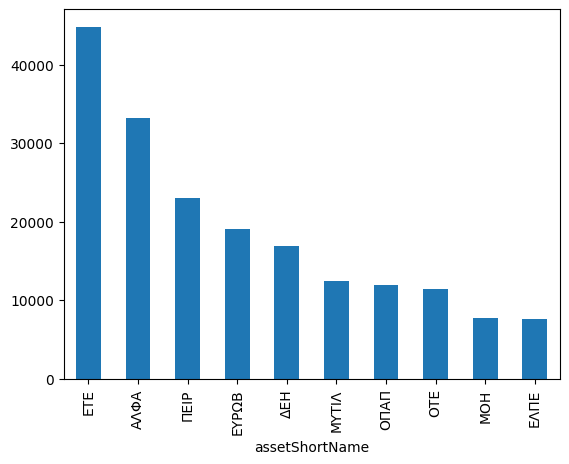

In [7]:
volume_df = pd.merge(transactions_df,asset_info_df.drop(columns=['timestamp','marketID']), on='ISIN', how='left')
top10_traded = volume_df['assetShortName'].value_counts()[:10]
top10_traded.plot(kind='bar')
display(volume_df)


##### Viewing which asset type is mostly traded

In [8]:
transaction_asset_types = volume_df['assetCategory'].value_counts()
transaction_asset_types

assetCategory
Stock    347824
MTF       29666
Bond      25044
Name: count, dtype: int64

##### What is the distribution of monthly transactions per asset category?

In [51]:
volume_df['timestamp'] = pd.to_datetime(volume_df['timestamp'])

df1 = volume_df.groupby([volume_df['timestamp'].dt.year, volume_df['timestamp'].dt.month])

grouped = df1['assetCategory'].value_counts()
grouped

# sns.barplot(x=grouped.index.get_level_values(1), y=grouped.values, hue=grouped.index.get_level_values(2))


timestamp  timestamp  assetCategory
2018       1          Stock            32474
                      MTF               6829
                      Bond                93
           2          Stock             2409
                      MTF                133
                                       ...  
2022       10         MTF                348
                      Bond               170
           11         Stock             5787
                      MTF                383
                      Bond               302
Name: count, Length: 176, dtype: int64

<Axes: xlabel='customerType'>

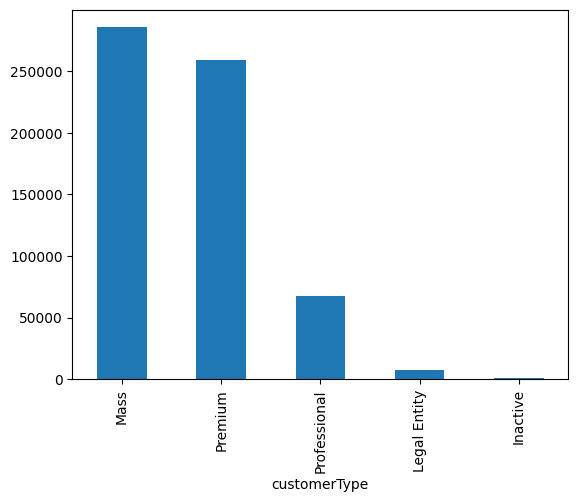

In [9]:
transactions_customers = transactions_df.merge(customer_info_df, on='customerID', how='left')
transactions_customers['customerType'].value_counts().plot(kind='bar')

### Visualizing the daily price changes of the top 10 assets

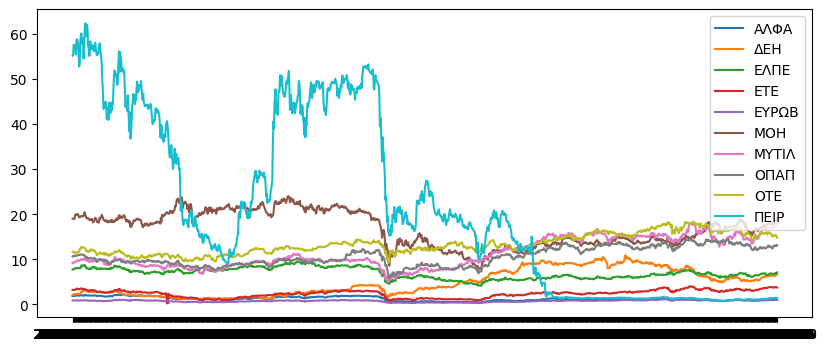

In [ ]:
closex_assets = close_prices_df.merge(asset_info_df, on='ISIN', how='left')

fig, ax = plt.subplots(figsize=(10,4))
top_assets_df = closex_assets[closex_assets['assetShortName'].isin(top10_traded.keys())]
for key,group in top_assets_df.groupby('assetShortName'):
    ax.plot(group['timestamp_x'], group['closePrice'], label=key)

plt.legend()
plt.show()